In [1]:
push!(LOAD_PATH, joinpath(pwd(), "src"))
import Analysis, Summary, PlotTools
using Sessions, JLD, PyPlot, Distributions, HypothesisTests, StatsBase, RCall
VersionNumber(matplotlib[:__version__]) >= v"2.0" && matplotlib[:style][:use]("classic");

# Results

### Summary of the number of recorded units

In [2]:
@load joinpath("processed", "permpval.jld") chs
unit_mask = Summary.unit_mask(chs, :MTL)
println("$(length(unique([ch.session for ch in chs[unit_mask]]))) Sessions")
println("$(length(unique([ch.session[1:3] for ch in chs[unit_mask]]))) Patients")
println("$(sum(unit_mask)) Units")
println("    $(sum(unit_mask[[ismatch(REGIONS[:PHG], ch.site) for ch in chs]])) Parahippocampal Units")
println("    $(sum(unit_mask[[ismatch(REGIONS[:EC], ch.site) for ch in chs]])) Entorhinal Units")
println("    $(sum(unit_mask[[ismatch(REGIONS[:H], ch.site) for ch in chs]])) Hippocampal Units")
println("    $(sum(unit_mask[[ismatch(REGIONS[:A], ch.site) for ch in chs]])) Amygdala Units")
println("$(Summary.to_pct([ch.unit_type == :SU for ch in chs[unit_mask]])) Single Units")
println("$(Summary.to_pct([ch.unit_type == :MU for ch in chs[unit_mask]])) Multi Units")

41 Sessions
18 Patients
1807 Units
    387 Parahippocampal Units
    378 Entorhinal Units
    518 Hippocampal Units
    524 Amygdala Units
37% (668/1807) Single Units
63% (1139/1807) Multi Units


### Summary of the number of selective units

In [3]:
Summary.stimsel_info()

17% (312/1807) units responsive
    25% (96/387) Parahippocampal Units
    17% (64/378) Entorhinal Units
    15% (77/518) Hippocampal Units
    14% (75/524) Amygdala Units
PHG vs.  EC p = 0.00946
PHG vs.   H p = 0.000252
PHG vs.   A p = 9.48e-05
 EC vs.   H p = 0.455
 EC vs.   A p = 0.326
  H vs.   A p = 0.869


### Plot of an example response (Figure 1B)

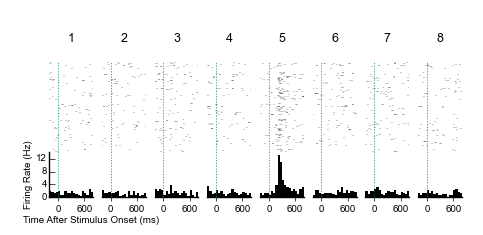

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [4]:
Summary.plot_stimulus_all(:sample, Sessions.readsession("398e12sb-2007-5-16_15-55-53"), 8, 2, header=false)

# Responses Persist Until Subsequent Image Presentation

### Number of units selective at all ISIs

In [5]:
@assert length(setdiff(Analysis.allisisigunits(), Analysis.permselunits())) == 0
length(Analysis.allisisigunits())

107

### ANOVA table for latency effects

In [6]:
Summary.resptime_anova(:latency)

RCall.RObject{RCall.VecSxp}
$ANOVA
       Effect DFn DFd          SSn       SSd            F            p p<.05
1 (Intercept)   1 103 24211274.804 1286983.0 1937.6801373 1.297783e-68     *
2      region   3 103   547402.243 1286983.0   14.6032577 5.389709e-08     *
3         isi   3 309     7346.467  915940.7    0.8261301 4.802833e-01      
4  region:isi   9 309    48824.848  915940.7    1.8301619 6.227236e-02      
          ges
1 0.916600777
2 0.199031776
3 0.003323787
4 0.021683082

$`Mauchly's Test for Sphericity`
      Effect        W         p p<.05
3        isi 0.928022 0.1798049      
4 region:isi 0.928022 0.1798049      

$`Sphericity Corrections`
      Effect       GGe      p[GG] p[GG]<.05      HFe      p[HF] p[HF]<.05
3        isi 0.9544014 0.47560049           0.984564 0.47872333          
4 region:isi 0.9544014 0.06588222           0.984564 0.06346957          


ISI    0 vs.  200  t(106) = 1.3 p = 0.193
ISI    0 vs.  500  t(106) = 1.4 p = 0.157
ISI    0 vs.  800  t(106) =

### Table of latencies by ISI and region (Table S1)

In [7]:
Summary.resptime_table(:latency)

6×6 Array{Any,2}:
 ""    "ISI 0"     "ISI 200"   "ISI 500"   "ISI 800"   "Average" 
 :PHG  "198 (89)"  "199 (75)"  "190 (81)"  "207 (77)"  "198 (67)"
 :EC   "292 (62)"  "252 (98)"  "268 (50)"  "276 (71)"  "272 (57)"
 :H    "296 (68)"  "285 (61)"  "281 (60)"  "280 (61)"  "286 (42)"
 :A    "244 (72)"  "248 (62)"  "253 (50)"  "208 (78)"  "238 (39)"
 :All  "245 (87)"  "235 (82)"  "236 (76)"  "235 (80)"  "238 (66)"

### ANOVA table for duration effects

In [8]:
Summary.resptime_anova(:duration)


RCall.RObject{RCall.VecSxp}
$ANOVA
       Effect DFn DFd      SSn      SSd          F            p p<.05
1 (Intercept)   1 103 45959401 10659091 444.110893 3.881871e-39     *
2      region   3 103  2015375 10659091   6.491598 4.564148e-04     *
3         isi   3 309  3205237 10809755  30.540877 2.559728e-17     *
4  region:isi   9 309   420474 10809755   1.335486 2.176139e-01      
         ges
1 0.68160457
2 0.08581825
3 0.12990298
4 0.01920909

$`Mauchly's Test for Sphericity`
      Effect         W            p p<.05
3        isi 0.7426729 1.311216e-05     *
4 region:isi 0.7426729 1.311216e-05     *

$`Sphericity Corrections`
      Effect       GGe        p[GG] p[GG]<.05       HFe       p[HF] p[HF]<.05
3        isi 0.8350183 7.379581e-15         * 0.8575082 3.40736e-15         *
4 region:isi 0.8350183 2.297534e-01           0.8575082 2.28058e-01          


ISI    0 vs.  200  t(106) = -4.1 p = 8.8e-05
ISI    0 vs.  500  t(106) = -7.3 p = 5.33e-11
ISI    0 vs.  800  t(106) = -6.8 p 

### Plot of a unit where duration differed by ISI (Figure 2A)

ISI = 0 ms onset = 248 offset = 436 duration = 188
ISI = 200 ms onset = 230 offset = 624 duration = 394
ISI = 500 ms onset = 236 offset = 887 duration = 651


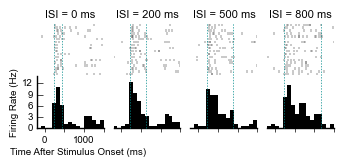

ISI = 800 ms onset = 230 offset = 1166 duration = 936


In [9]:
Summary.plot_isi_single(Sessions.readsession("407e13sb-2008-4-11_14-36-46"), 1, 2, 8)

### Plot of durations by ISI (Figure 2B)

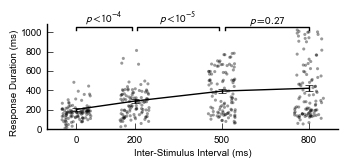

In [10]:
Summary.plot_resptime(:duration)

### Differences in durations between regions

In [11]:
Summary.resptime_region_differences(:duration)

PHG: 382 ms
EC: 223 ms
H: 270 ms
A: 380 ms
PHG vs.  EC t(63) = 4.2 p = 7.7e-05
PHG vs.   H t(51) = 2.5 p = 0.016
PHG vs.   A t(63) = 0.051 p = 0.96
 EC vs.   H t(31) = -1.3 p = 0.22
 EC vs.   A t(41) = -5 p = 1.3e-05
  H vs.   A t(35) = -2.7 p = 0.0096


### Table of durations by ISI and region (Table S2)

In [12]:
Summary.resptime_table(:duration)

6×6 Array{Any,2}:
 ""    "ISI 0"      "ISI 200"    "ISI 500"    "ISI 800"    "Average"  
 :PHG  "247 (219)"  "363 (241)"  "451 (267)"  "468 (330)"  "382 (209)"
 :EC   "128 (59)"   "200 (106)"  "265 (167)"  "299 (240)"  "223 (96)" 
 :H    "169 (82)"   "237 (158)"  "368 (236)"  "306 (213)"  "270 (138)"
 :A    "231 (287)"  "289 (101)"  "437 (196)"  "564 (315)"  "380 (115)"
 :All  "204 (199)"  "290 (190)"  "393 (238)"  "423 (305)"  "328 (173)"

### Proportion of variance explained by ISI (Figure 2C)

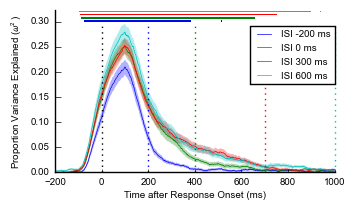

ISI 0.0 min p = 0.0 @ -68
ISI 0.0 significant in (-73,379)
ISI 200.0 min p = 0.0 @ -80
ISI 200.0 significant in (-85,656)
ISI 500.0 min p = 0.0 @ -80
ISI 500.0 significant in (-91,748)
ISI 800.0 min p = 0.0 @ -90
ISI 800.0 significant in (-94,895)


In [13]:
Summary.plot_alignedisi()

### Proportion of variance explained for ISI interactions (Figure S1)

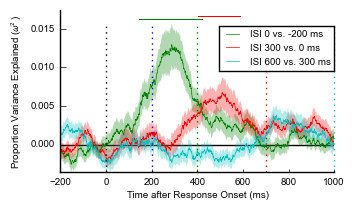

ISI 200.0 - 0.0 min p = 0.0 @ 159
ISI 200.0 - 0.0 significant in (146,419)
ISI 500.0 - 200.0 min p = 0.001 @ 505
ISI 500.0 - 200.0 significant in (415,578)
ISI 800.0 - 500.0 min p = 0.10400000000000001 @ 746


In [14]:
Summary.plot_alignedisi(compare=true)

### Proportion of units carrying information in selected windows by ISI

In [15]:
@load joinpath("processed", "permpval_isiwin.jld") chs pval_cumulative
sel = findin(chs, Analysis.permselunits())
alpha = 0.01
pval_cumulative = cat(3, pval_cumulative[sel]...)
@printf("%s selective from 200-400 ms at ISI > 0 ms (p = %.1g)\n",
Summary.to_pct(pval_cumulative[2, 2, :] .< alpha),
pvalue(BinomialTest(pval_cumulative[2, 2, :] .< alpha, alpha), tail=:right))
@printf("%s selective from 400-700 ms at ISI > 200 ms (p = %.1g)\n",
Summary.to_pct(pval_cumulative[3, 3, :] .< alpha),
pvalue(BinomialTest(pval_cumulative[3, 3, :] .< alpha, alpha), tail=:right))
@printf("%s selective from 700-900 ms at ISI = 800 ms (p = %.1g)\n",
Summary.to_pct(pval_cumulative[4, 4, :] .< alpha),
pvalue(BinomialTest(pval_cumulative[4, 4, :] .< alpha, alpha), tail=:right))

48% (150/312) selective from 200-400 ms at ISI > 0 ms (p = 6e-209)
18% (55/312) selective from 400-700 ms at ISI > 200 ms (p = 6e-50)
5.1% (16/312) selective from 700-900 ms at ISI = 800 ms (p = 2e-07)


# Maintenance Period Activity

### Proportions of selective units

In [16]:
Summary.wm_units(:all)

7.7% (24/312) of stimulus-selective units significant at maintenance at α = 0.01 (p = 2.9e-14)
13% (42/312) of stimulus-selective units significant at maintenance at α = 0.05 (p = 7.3e-09)
4.2% (13/312) of stimulus-selective units significant at maintenance at α = 0.001 (p = 2.5e-17)
0.54% (8/1495) of non-stimulus-selective units significant at maintenance at α = 0.01 (p = 0.98)
3.8% (57/1495) of non-stimulus-selective units significant at maintenance at α = 0.05 (p = 0.99)
0.067% (1/1495) of non-stimulus-selective units significant at maintenance at α = 0.001 (p = 0.78)
9.4% (9/96) of units in PHG show significant maintenance period activity at α = 0.01 (p = 5.9e-07)
4.7% (3/64) of units in EC show significant maintenance period activity at α = 0.01 (p = 0.027)
3.9% (3/77) of units in H show significant maintenance period activity at α = 0.01 (p = 0.042)
12% (9/75) of units in A show significant maintenance period activity at α = 0.01 (p = 6.9e-08)


### Plot of selective unit (Figure 3)

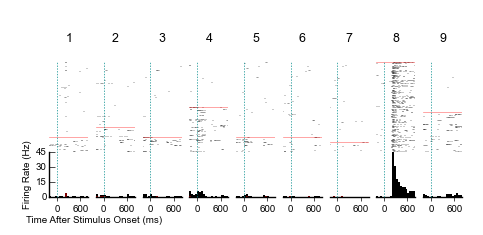

In [17]:
Summary.plot_stimulus_all(:maintenance, Sessions.readsession("399e11sb-2007-7-21_16-34-42"), 8, 2, highlight=8, header=false)
Summary.plot_stimulus_all(:sample, Sessions.readsession("399e11sb-2007-7-21_16-34-42"), 8, 2, highlight=8, header=false)

### Plots for additional maintenance-selective units (Figure S2)

In [ ]:
@load joinpath("processed", "modulation_presentation.jld") chs stim_fr_win baseline_fr_win
stringchs = map(string, chs)
beststim = [indmax(abs(x - bsx)) for (x, bsx) in zip(stim_fr_win, baseline_fr_win)]

for chstring in Summary.FIGS2_UNITS
    ich = findfirst(stringchs, chstring)
    ch = chs[ich]
    Summary.plot_stimulus_both(Sessions.readsession(ch.session),
    ch.channel, ch.cluster, highlight=beststim[ich], small=true)
end

### Table of selective units (Table S3)

In [19]:
Summary.selunits_table()

Patient	# Units	# Vis	# Maint	% Vis		% Maint
395	141	9	0	6% (3%-12%)	0% (0%-34%)
396	170	14	1	8% (5%-13%)	7% (0%-34%)
397	30	3	0	10% (2%-27%)	0% (0%-71%)
398	129	48	1	37% (29%-46%)	2% (0%-11%)
399	68	29	10	43% (31%-55%)	34% (18%-54%)
400	88	22	1	25% (16%-35%)	5% (0%-23%)
401	204	17	0	8% (5%-13%)	0% (0%-20%)
402	184	37	1	20% (15%-27%)	3% (0%-14%)
403	79	6	1	8% (3%-16%)	17% (0%-64%)
404	19	0	0	0% (0%-18%)	NaN% (NaN%-NaN%)
405	84	20	1	24% (15%-34%)	5% (0%-25%)
406	61	6	1	10% (4%-20%)	17% (0%-64%)
407	170	41	3	24% (18%-31%)	7% (2%-20%)
409	151	31	4	21% (14%-28%)	13% (4%-30%)
410	93	6	0	6% (2%-14%)	0% (0%-46%)
411	47	5	0	11% (4%-23%)	0% (0%-52%)
412	52	10	0	19% (10%-33%)	0% (0%-31%)
413	37	8	0	22% (10%-38%)	0% (0%-37%)
TOTAL	1807	312	24	17% (16%-19%)	8% (5%-11%)


### Mean proportion of variance explained during maintenance

In [20]:
@load joinpath("processed", "modulation_maintenance.jld") chs pve
mask = findin(chs, Analysis.permselunits())
v = pve[mask][!isnan(pve[mask])]
ci = Analysis.bs95ci(v, rand(1:length(v), length(v), 10000))
@printf("Mean ω² = %.3f, 95%% CI = %.3f - %.3f\n", mean(v), ci[1], ci[2])

Mean ω² = 0.011, 95% CI = 0.006 - 0.016


### Relationship between preferred stimuli at presentation and maintenance

In [21]:
selselch = intersect(Analysis.maintselunits(), Analysis.permselunits())
@load joinpath("processed", "modulation_maintenance.jld") chs means
maintsel = indexin(selselch, chs)
nstim = map(length, means[maintsel])
maintfr = means[maintsel]
@load joinpath("processed", "modulation_presentation.jld") chs stim_fr_win baseline_fr_win
pressel = indexin(selselch, chs)
presfr = stim_fr_win[pressel]
baseline = baseline_fr_win[pressel]

sgn = [maxabs(fr-bs) == maximum(fr-bs) ? 1 : -1 for (fr, bs) in zip(presfr, baseline)]
best_maintenance = [indmax(sgn*(fr - bs)) for (fr, bs, sgn) in zip(maintfr, baseline, sgn)]
best_presentation = [indmax(sgn*(fr - bs)) for (fr, bs, sgn) in zip(presfr, baseline, sgn)]

@printf("%s of units have same top stimulus (chance %d%%, p = %.2g)\n",
Summary.to_pct(best_maintenance .== best_presentation), mean(1./nstim)*100,
ccdf(PoissonBinomial(1./nstim), sum(best_maintenance .== best_presentation)-1))

meancor, cors, pmeancor, pvalunit = Summary.meancortest(presfr, maintfr, 10000000)
@printf("Mean correlation is %.2f (p = %.2g)\n", meancor, pmeancor)

71% (17/24) of units have same top stimulus (chance 12%, p = 1.8e-11)
Mean correlation is 0.74 (p = 1e-07)


### Scatterplots of selectivity at presentation vs. maintenance (Figure S3A)

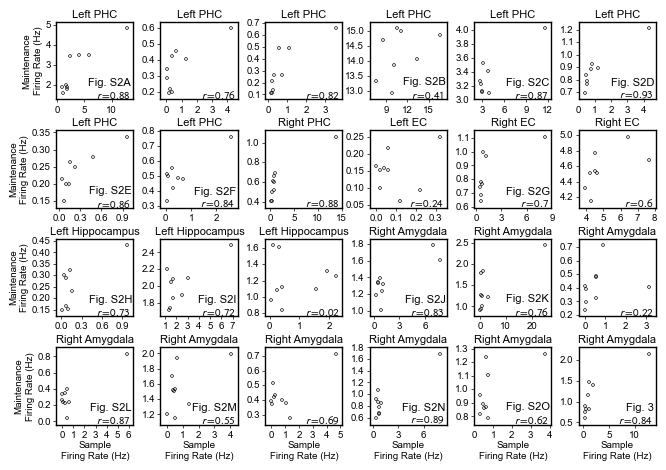

In [22]:
Summary.corscatter()

### Modulation strength at presentation and baseline (Figure S3B)

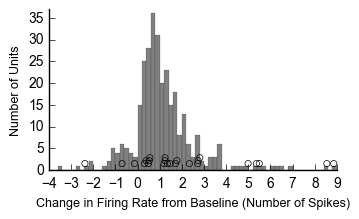

Median maintenance: 1.6; median no maintenance: 0.9; U = 4.46e+03, p = 0.019


In [23]:
Summary.responsestrength()

### Maintenance period modulation assessed by comparing responses to preferred and non-preferred stimuli

In [24]:
selch = intersect(Analysis.permselunits(), Analysis.maintselunits())
@load joinpath("processed", "maintenance_topstim_holdout.jld") chs pval_mwu sep ng1 ng2 ispositive
for (title, mych) = [
        ("all visually selective", Analysis.permselunits()),
        ("maintenance-selective by linear model", selch),
        ("maintenance-selective by preferred stimulus",
         intersect(Analysis.permselunits(), chs[pval_mwu .< 0.01])),
        ("visually selective, but not maintenance-selective by permutation F test",
         setdiff(Analysis.permselunits(), selch)),
        ("visually selective, but not maintenance-selective by either test",
         setdiff(Analysis.permselunits(), union(selch, chs[pval_mwu .< 0.01]))),
        ("not visually selective",
        setdiff(chs[Summary.unit_mask(chs)], Analysis.permselunits()))
    ]
    sel = findin(chs, mych)
    sep2 = sep[sel]
    sep2 = sep2[isfinite(sep2)]
    println(title, " (", length(sep2), " units)")
    tst = OneSampleTTest(sep2)
    @printf("  μ = %.3f t(%d) = %.1f, p = %.2g\n", mean(sep2), tst.df, tst.t, pvalue(tst))
end

all visually selective (312 units)
  μ = 0.086 t(311) = 6.4, p = 4.7e-10
maintenance-selective by linear model (24 units)
  μ = 0.474 t(23) = 5.8, p = 5.9e-06
maintenance-selective by preferred stimulus (19 units)
  μ = 0.602 t(18) = 7.0, p = 1.4e-06
visually selective, but not maintenance-selective by permutation F test (288 units)
  μ = 0.053 t(287) = 4.9, p = 1.3e-06
visually selective, but not maintenance-selective by either test (283 units)
  μ = 0.049 t(282) = 4.7, p = 4.5e-06
not visually selective (1488 units)
  μ = -0.002 t(1487) = -0.6, p = 0.53


### Comparison of maintenance period modulation by stimulus position in stream (Figure 3C)

RCall.RObject{RCall.VecSxp}
$ANOVA
       Effect DFn DFd       SSn      SSd         F            p p<.05
1 (Intercept)   1 311 7.5447823 55.65570 42.159695 3.324917e-10     *
2         pos   2 622 0.2927761 36.57397  2.489568 8.377205e-02      
         ges
1 0.07561838
2 0.00316438

$`Mauchly's Test for Sphericity`
  Effect         W           p p<.05
2    pos 0.8427409 3.03798e-12     *

$`Sphericity Corrections`
  Effect       GGe      p[GG] p[GG]<.05       HFe      p[HF] p[HF]<.05
2    pos 0.8641108 0.09196865           0.8685001 0.09169462          


Third to Last mod = 0.07 t(311) = 4.7, p = 4.5e-06
Second to Last mod = 0.08 t(311) = 5.3, p = 1.8e-07
Last  mod = 

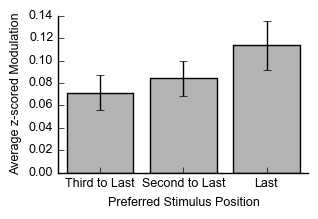

0.11 t(311) = 5.3, p = 2.7e-07


In [25]:
positions = ["Third to Last", "Second to Last", "Last"]
@load joinpath("processed", "maintenance_topstim_holdout.jld") chs sep_by_pos
sel = findin(chs, Analysis.permselunits())
notlast = [mean(x[1:end-1]) for x in sep_by_pos[sel]]
last = [x[end] for x in sep_by_pos[sel]]
y = hcat([x[end-2:end] for x in sep_by_pos[sel]]...)
pos = vec(repmat(1:3, 1, size(y, 2)))
cell = vec(repmat(reshape(1:size(y, 2), 1, size(y, 2)), size(y, 1), 1))
bar(0.6:3, mean(y, 2), yerr=std(y, 2)/sqrt(size(y, 2)), color=(0.7, 0.7, 0.7), ecolor="k")
yticks(fontsize=9)
ylabel("Average z-scored Modulation", fontsize=9)
xticks(1:3, positions, fontsize=9)
xlabel("Preferred Stimulus Position", fontsize=9)
println(R"""
library(ez)
df = data.frame(y=$(vec(y)), pos=factor($pos), cell=factor($cell))
ezANOVA(df, y, cell, within=pos, type=2, detailed=TRUE)
""")
t = OneSampleTTest(y[1, :])
@printf "Third to Last mod = %.2f t(%d) = %.1f, p = %.2g\n" t.xbar t.df t.t pvalue(t)
t = OneSampleTTest(y[2, :])
@printf "Second to Last mod = %.2f t(%d) = %.1f, p = %.2g\n" t.xbar t.df t.t pvalue(t)
t = OneSampleTTest(y[3, :])
@printf "Last  mod = %.2f t(%d) = %.1f, p = %.2g\n" t.xbar t.df t.t pvalue(t)
gcf()[:set_size_inches](3, 2)
PlotTools.removespines()
gca()[:yaxis][:set_ticks_position]("left")
gca()[:xaxis][:set_ticks_position]("bottom")
tight_layout(pad=0.1)
savefig("modbypos.pdf")

### Modulation according to trial correct/incorrect status at presentation

In [26]:
Summary.wm_correct(:pres)

all visually selective
  median 19.0 correct trials, 3.0 incorrect trials
  at α = 0.01, 0.36% (1/274) significant (p = 0.94)
  population effect 0.35, t(273) = 2.449, p = 0.01495
  bootstrap vs. 0 p = 0.013
visually selective, but not maintenance-selective
  median 19.0 correct trials, 3.0 incorrect trials
  at α = 0.01, 0.39% (1/254) significant (p = 0.92)
  population effect 0.31, t(253) = 2.156, p = 0.03202
  bootstrap vs. 0 p = 0.03
maintenance-selective
  median 20.5 correct trials, 3.0 incorrect trials
  at α = 0.01, 0% (0/20) significant (p = 1)
  population effect 0.90, t(19) = 1.179, p = 0.253
  bootstrap vs. 0 p = 0.22


### Modulation according to trial correct/incorrect status from 300 to 700 ms after onset latency on trials with ISI >= 500 ms

In [27]:
Summary.wm_correct(:persist)

all visually selective
  median 9.0 correct trials, 2.0 incorrect trials
  at α = 0.01, 2.7% (5/186) significant (p = 0.04)
  population effect 0.26, t(185) = 2.365, p = 0.01904
  bootstrap vs. 0 p = 0.022
visually selective, but not maintenance-selective
  median 9.0 correct trials, 2.0 incorrect trials
  at α = 0.01, 2.8% (5/176) significant (p = 0.033)
  population effect 0.25, t(175) = 2.147, p = 0.03321
  bootstrap vs. 0 p = 0.037
maintenance-selective
  median 9.5 correct trials, 2.0 incorrect trials
  at α = 0.01, 0% (0/10) significant (p = 1)
  population effect 0.52, t(9) = 1.374, p = 0.2026
  bootstrap vs. 0 p = 0.14


### Modulation according to trial correct/incorrect status during maintenance

In [28]:
Summary.wm_correct(:maint)

all visually selective
  median 19.0 correct trials, 3.0 incorrect trials
  at α = 0.01, 0.73% (2/274) significant (p = 0.76)
  population effect 0.12, t(273) = 3.545, p = 0.000461
  bootstrap vs. 0 p = 0.00041
visually selective, but not maintenance-selective
  median 19.0 correct trials, 3.0 incorrect trials
  at α = 0.01, 0.79% (2/254) significant (p = 0.72)
  population effect 0.10, t(253) = 2.867, p = 0.004492
  bootstrap vs. 0 p = 0.0044
maintenance-selective
  median 20.5 correct trials, 3.0 incorrect trials
  at α = 0.01, 0% (0/20) significant (p = 1)
  population effect 0.36, t(19) = 3.561, p = 0.002086
  bootstrap vs. 0 p = 2.4e-05


# Supplemental Experimental Procedures

### Number of sessions by number of stimuli/stimuli per trial

In [29]:
sessinfo = TaskData.sessinfo();
for (k, v) in countmap(sessinfo[:stimuli])
    println("$v sessions with $k stimuli")
end
println()
for (k, v) in countmap(sessinfo[:npertrial])
    println("$v sessions with $k stimuli per trial")
end

12 sessions with 9 stimuli
29 sessions with 8 stimuli

29 sessions with 4 stimuli per trial
12 sessions with 3 stimuli per trial


### Behavioral performance

In [30]:
@printf("Average performance: %.0f%%\n", mean(sessinfo[:correct])*100)
@printf("Inter-quartile range: %.0f%%-%.0f%%\n", quantile(sessinfo[:correct], 0.25)*100, quantile(sessinfo[:correct], 0.75)*100)
minp_correct = maximum([pvalue(BinomialTest(trials.*correct, trials), tail=:right) for (trials, correct) = zip(sessinfo[:trials], sessinfo[:correct])])
@printf("Worst subject performance vs. chance: p = %.2f", minp_correct)

Average performance: 80%
Inter-quartile range: 70%-92%
Worst subject performance vs. chance: p = 0.02

Because stimulus names have been anonymized in this dataset, it is not possible to analyze responses to stimuli repeated over multiple sessions. Thus, we do not reproduce this analysis here.

### McNemar test for differences in the number of selective units between ISI conditions

In [31]:
@load joinpath("processed", "permpval_eachisi.jld") chs pval
pvs = hcat(pval[Summary.unit_mask(chs)]...)
alpha = 0.05
for i = 1:4
    println("ISI $(TaskData.ISI[i]*1000) $(Summary.to_pct(pvs[i, :] .< alpha))")
end
for (a, b) in ((1, 2), (2, 3), (3, 4))
    X = [sum(!(pvs[a, :] .< alpha) & !(pvs[b, :] .< alpha)) sum(!(pvs[a, :] .< alpha) & (pvs[b, :] .< alpha))
         sum((pvs[a, :] .< alpha) & !(pvs[b, :] .< alpha))  sum((pvs[a, :] .< alpha) & (pvs[b, :] .< alpha))]
    println("ISI $(TaskData.ISI[a]*1000) vs. $(TaskData.ISI[b]*1000)")
    print(R"""
    library(exact2x2)
    mcnemar.exact($X)
    """)
    println()
end

ISI 0.0 10% (186/1807)
ISI 200.0 15% (264/1807)
ISI 500.0 17% (300/1807)
ISI 800.0 18% (328/1807)
ISI 0.0 vs. 200.0
RCall.RObject{RCall.VecSxp}

	Exact McNemar test (with central confidence intervals)

data:  `#JL`$X
b = 139, c = 61, p-value = 3.518e-08
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.674742 3.131900
sample estimates:
odds ratio 
  2.278689 


ISI 200.0 vs. 500.0
RCall.RObject{RCall.VecSxp}

	Exact McNemar test (with central confidence intervals)

data:  `#JL`$X
b = 123, c = 87, p-value = 0.01552
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.065649 1.882532
sample estimates:
odds ratio 
  1.413793 


ISI 500.0 vs. 800.0
RCall.RObject{RCall.VecSxp}

	Exact McNemar test (with central confidence intervals)

data:  `#JL`$X
b = 133, c = 105, p-value = 0.07987
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.9733284 1.6519677
sample estimates

Loading required package: ssanv


### ANOVA table for latency when excluding the first presentation of each trial

In [32]:
Summary.resptime_anova(:latency, notfirst=true)


RCall.RObject{RCall.VecSxp}
$ANOVA
       Effect DFn DFd        SSn     SSd          F            p p<.05
1 (Intercept)   1 103 28447611.3 4111539 712.653777 4.382792e-48     *
2      region   3 103   842203.2 4111539   7.032802 2.387007e-04     *
3         isi   3 309   101614.1 5666710   1.846971 1.385979e-01      
4  region:isi   9 309   261881.0 5666710   1.586678 1.182228e-01      
         ges
1 0.74419806
2 0.07930012
3 0.01028497
4 0.02608342

$`Mauchly's Test for Sphericity`
      Effect         W           p p<.05
3        isi 0.8251628 0.001519399     *
4 region:isi 0.8251628 0.001519399     *

$`Sphericity Corrections`
      Effect       GGe     p[GG] p[GG]<.05       HFe     p[HF] p[HF]<.05
3        isi 0.8827631 0.1461055           0.9082127 0.1444547          
4 region:isi 0.8827631 0.1291517           0.9082127 0.1266835          


ISI    0 vs.  200  t(106) = 1.4 p = 0.165
ISI    0 vs.  500  t(106) = 2.4 p = 0.0191
ISI    0 vs.  800  t(106) = 1.7 p = 0.0959
ISI  200 vs

### Stimulus/ISI interaction using only the first presentation of each trial

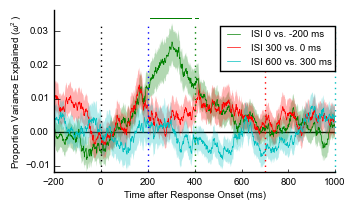

ISI 200.0 - 0.0 min p = 0.0 @ 289
ISI 200.0 - 0.0 significant in (211,380)
ISI 500.0 - 200.0 min p = 0.11 @ 164
ISI 800.0 - 500.0 min p = 0.872 @ 902


In [33]:
Summary.plot_alignedisi(pos1=true, compare=true)

### McNemar test for comparison of proportion of maintenance-selective units via permutation F test and Mann-Whitney U test of preferred/non-preferred stimulus

In [34]:
allch = Analysis.permselunits()
@load joinpath("processed", "permpval_maintenance.jld") chs pval
chs1 = chs
@load joinpath("processed", "maintenance_topstim_holdout.jld") chs pval_mwu
alpha = 0.01
selsel2 = pval_mwu[findin(chs, allch)] .< alpha
sel1ch = intersect(chs1[pval .< alpha], allch)
sel2ch = intersect(chs[pval_mwu .< alpha], allch)
@printf("%s of stimulus-selective units show preferred/non-preferred difference at α = %s (p = %.2g)\n",
Summary.to_pct(selsel2), alpha, pvalue(BinomialTest(selsel2, alpha), tail=:right))

X = [length(intersect(sel1ch, sel2ch)) length(setdiff(sel2ch, sel1ch))
    length(setdiff(sel1ch, sel2ch)) length(setdiff(allch, [sel1ch; sel2ch]))]
println(R"""
library(exact2x2)
mcnemar.exact($X)
""")

6.1% (19/312) of stimulus-selective units show preferred/non-preferred difference at α = 0.01 (p = 7.1e-10)
RCall.RObject{RCall.VecSxp}

	Exact McNemar test (with central confidence intervals)

data:  `#JL`$X
b = 5, c = 10, p-value = 0.3018
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.1340969 1.6054984
sample estimates:
odds ratio 
       0.5 




### Expected power of t-test with 3 incorrect trials and 19 correct trials and d = 0.1-0.2

In [35]:
R"library(pwr)"
@show R"pwr.t2n.test(3, 19, 0.1, sig.level=0.01)"
@show R"pwr.t2n.test(3, 19, 0.2, sig.level=0.01)";

@R_str("pwr.t2n.test(3, 19, 0.1, sig.level=0.01)") = RCall.RObject{RCall.VecSxp}

     t test power calculation 

             n1 = 3
             n2 = 19
              d = 0.1
      sig.level = 0.01
          power = 0.01082408
    alternative = two.sided


@R_str("pwr.t2n.test(3, 19, 0.2, sig.level=0.01)") = RCall.RObject{RCall.VecSxp}

     t test power calculation 

             n1 = 3
             n2 = 19
              d = 0.2
      sig.level = 0.01
          power = 0.01336056
    alternative = two.sided




### Number of selective units required to obtain significance in a binomial test vs. 0.01 at p < 0.05

In [36]:
quantile(Binomial(274, 0.01), 0.95)

6